# Clean

In [22]:
import pandas as pd

perturb_list = ["base", "perturb1", "perturb2"]
model_list = ["1PL", "2PL","3PL"]
for perturb in perturb_list:
    for model in model_list:
        file_path = f'model_coef/divided_{perturb}_coef_{model}.csv'
        df = pd.read_csv(file_path)

        # delete column
        df = df.iloc[:, 1:-2]

        new_columns = ['a1', 'd', 'g', 'u']
        data = {col: [] for col in new_columns}
        for i in range(0, len(df.columns), 4):
            for col, new_col in zip(df.columns[i:i+4], new_columns):
                data[new_col].append(df[col].values[0])

        new_df = pd.DataFrame(data)
        new_df.to_csv(f'model_coef/divided_{perturb}_coef_{model}_clean.csv', index=False)

# Visualize

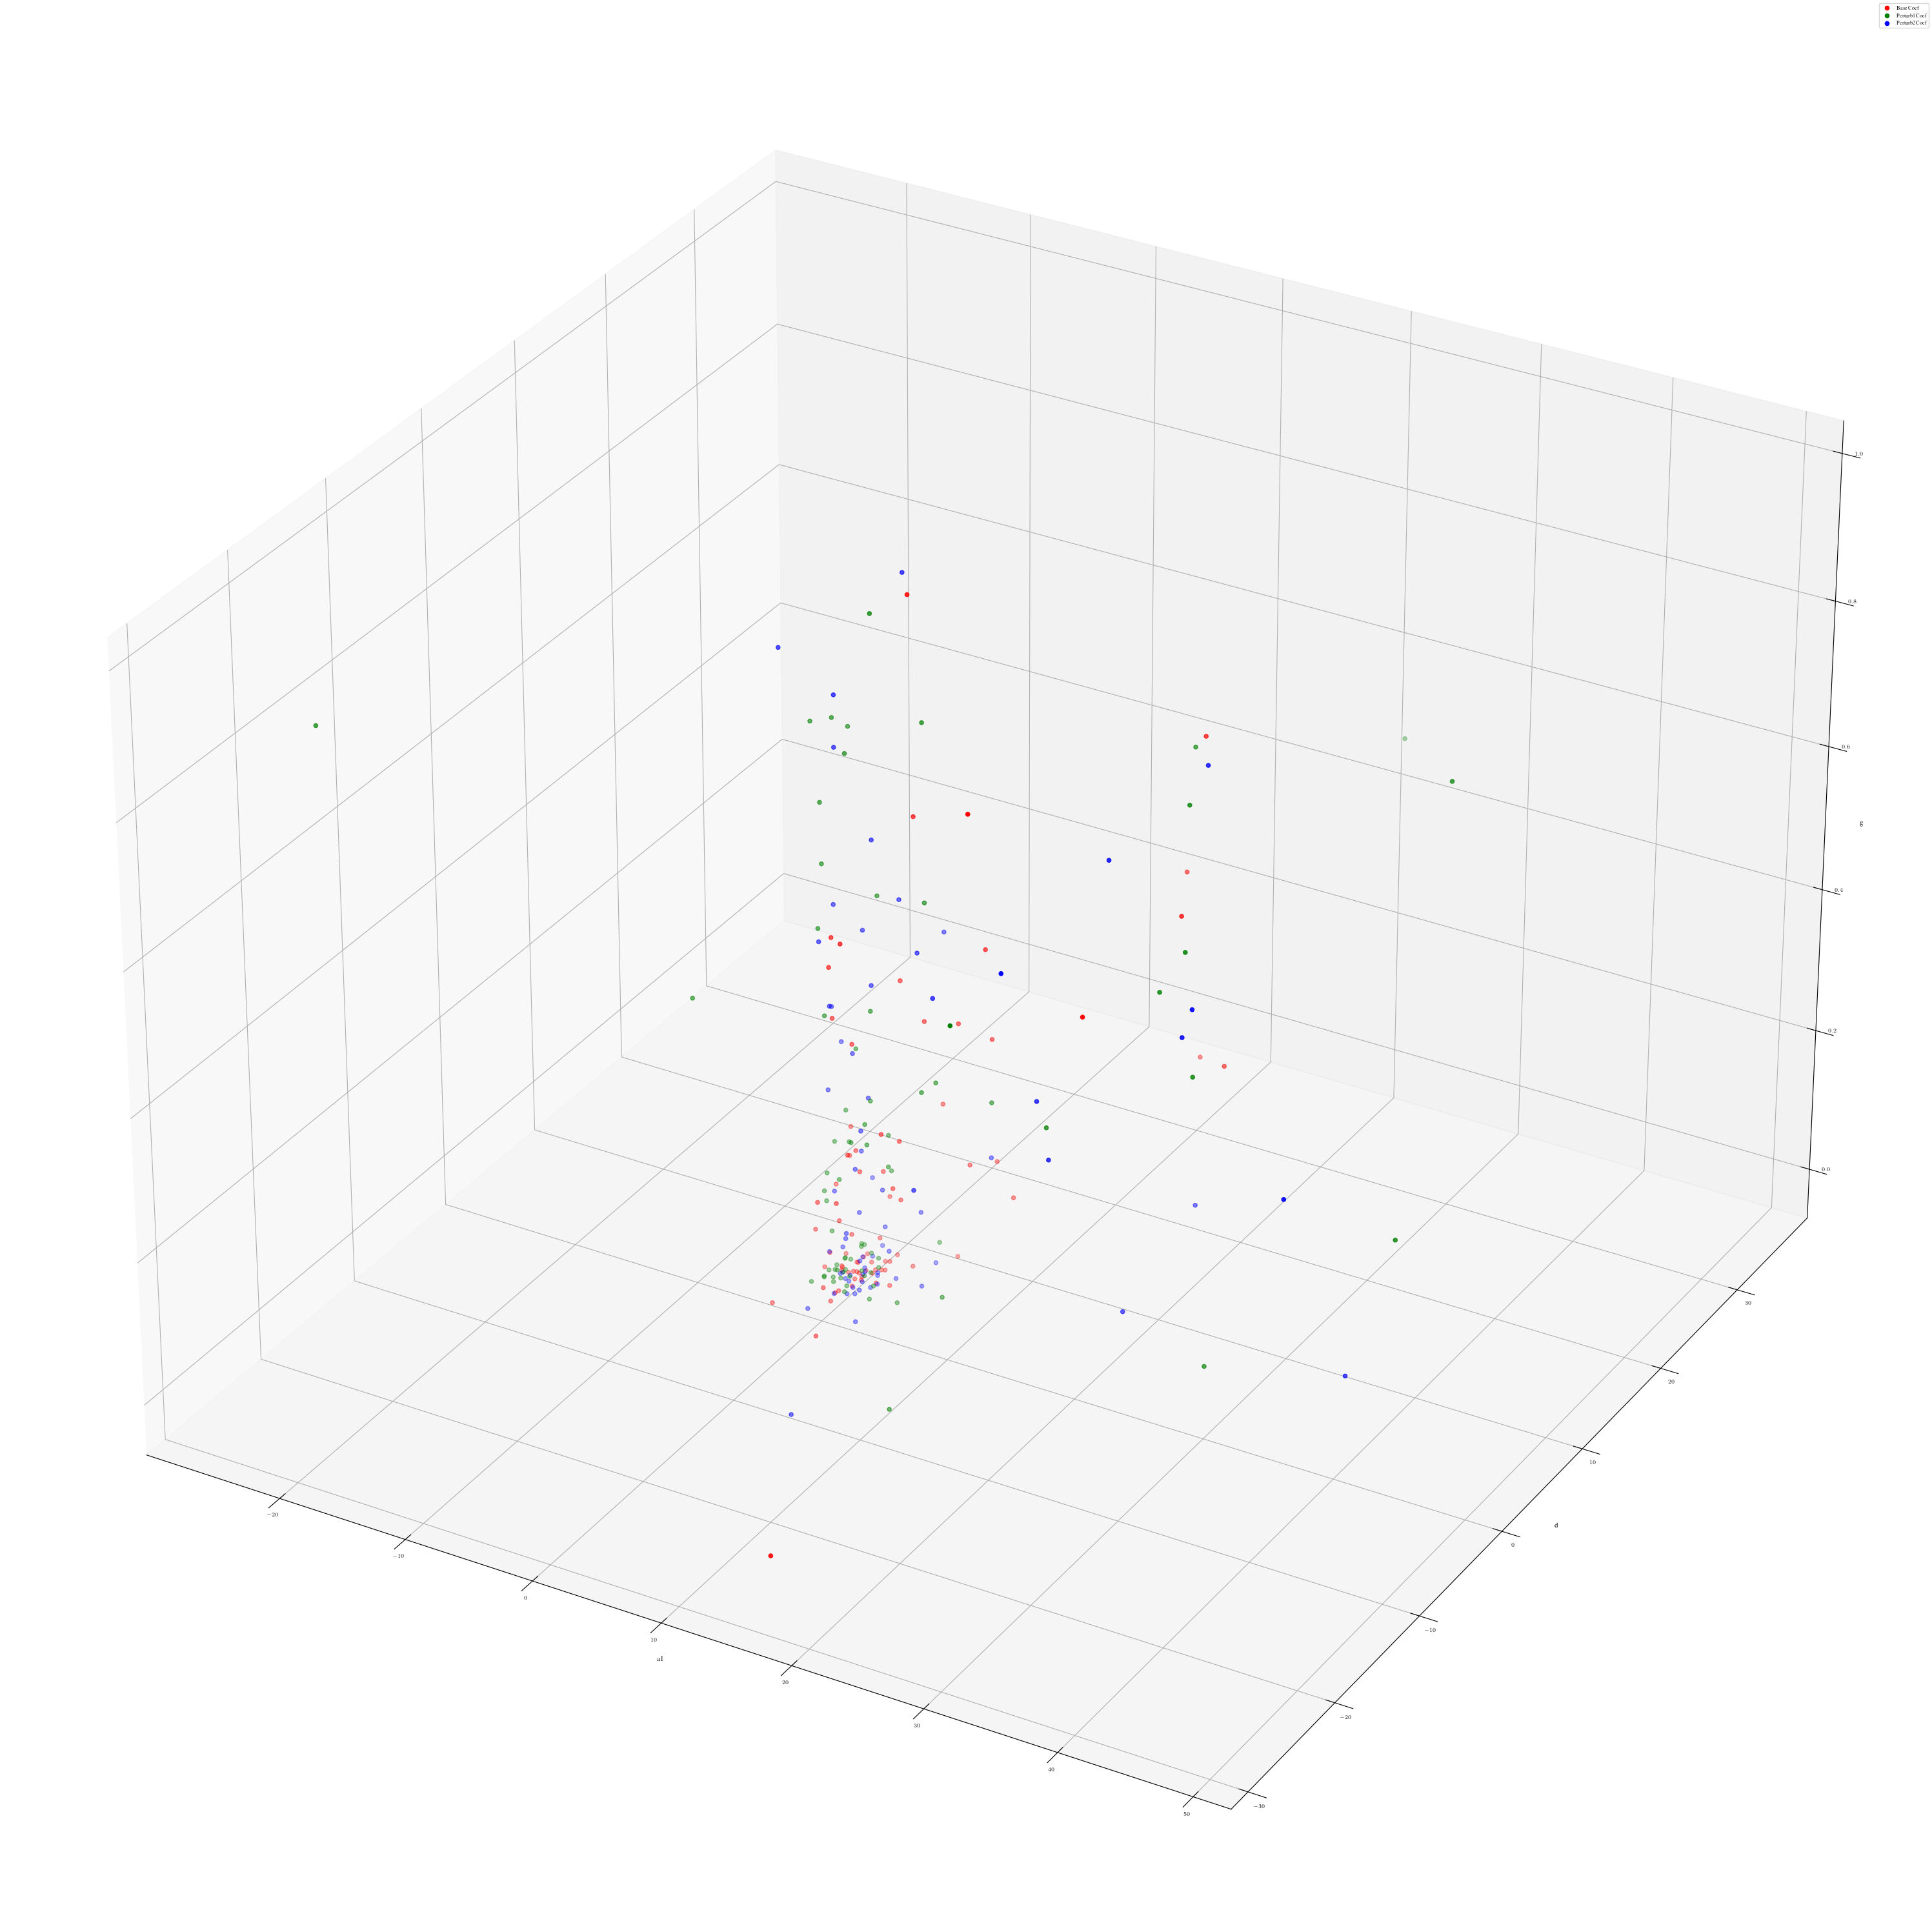

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

base_coef = pd.read_csv('model_coef/divided_base_coef_clean.csv', usecols=[0, 1, 2])
perturb1_coef = pd.read_csv('model_coef/divided_perturb1_coef_clean.csv', usecols=[0, 1, 2])
perturb2_coef = pd.read_csv('model_coef/divided_perturb2_coef_clean.csv', usecols=[0, 1, 2])

fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(base_coef.iloc[:, 0], base_coef.iloc[:, 1], base_coef.iloc[:, 2], c='r', label='Base Coef')
ax.scatter(perturb1_coef.iloc[:, 0], perturb1_coef.iloc[:, 1], perturb1_coef.iloc[:, 2], c='g', label='Perturb1 Coef')
ax.scatter(perturb2_coef.iloc[:, 0], perturb2_coef.iloc[:, 1], perturb2_coef.iloc[:, 2], c='b', label='Perturb2 Coef')

ax.set_xlabel('a1')
ax.set_ylabel('d')
ax.set_zlabel('g')

# ax.set_xlim(-3, 3)
# ax.set_ylim(-3, 3)
# ax.set_zlim(-3, 3)

ax.legend()
plt.show()

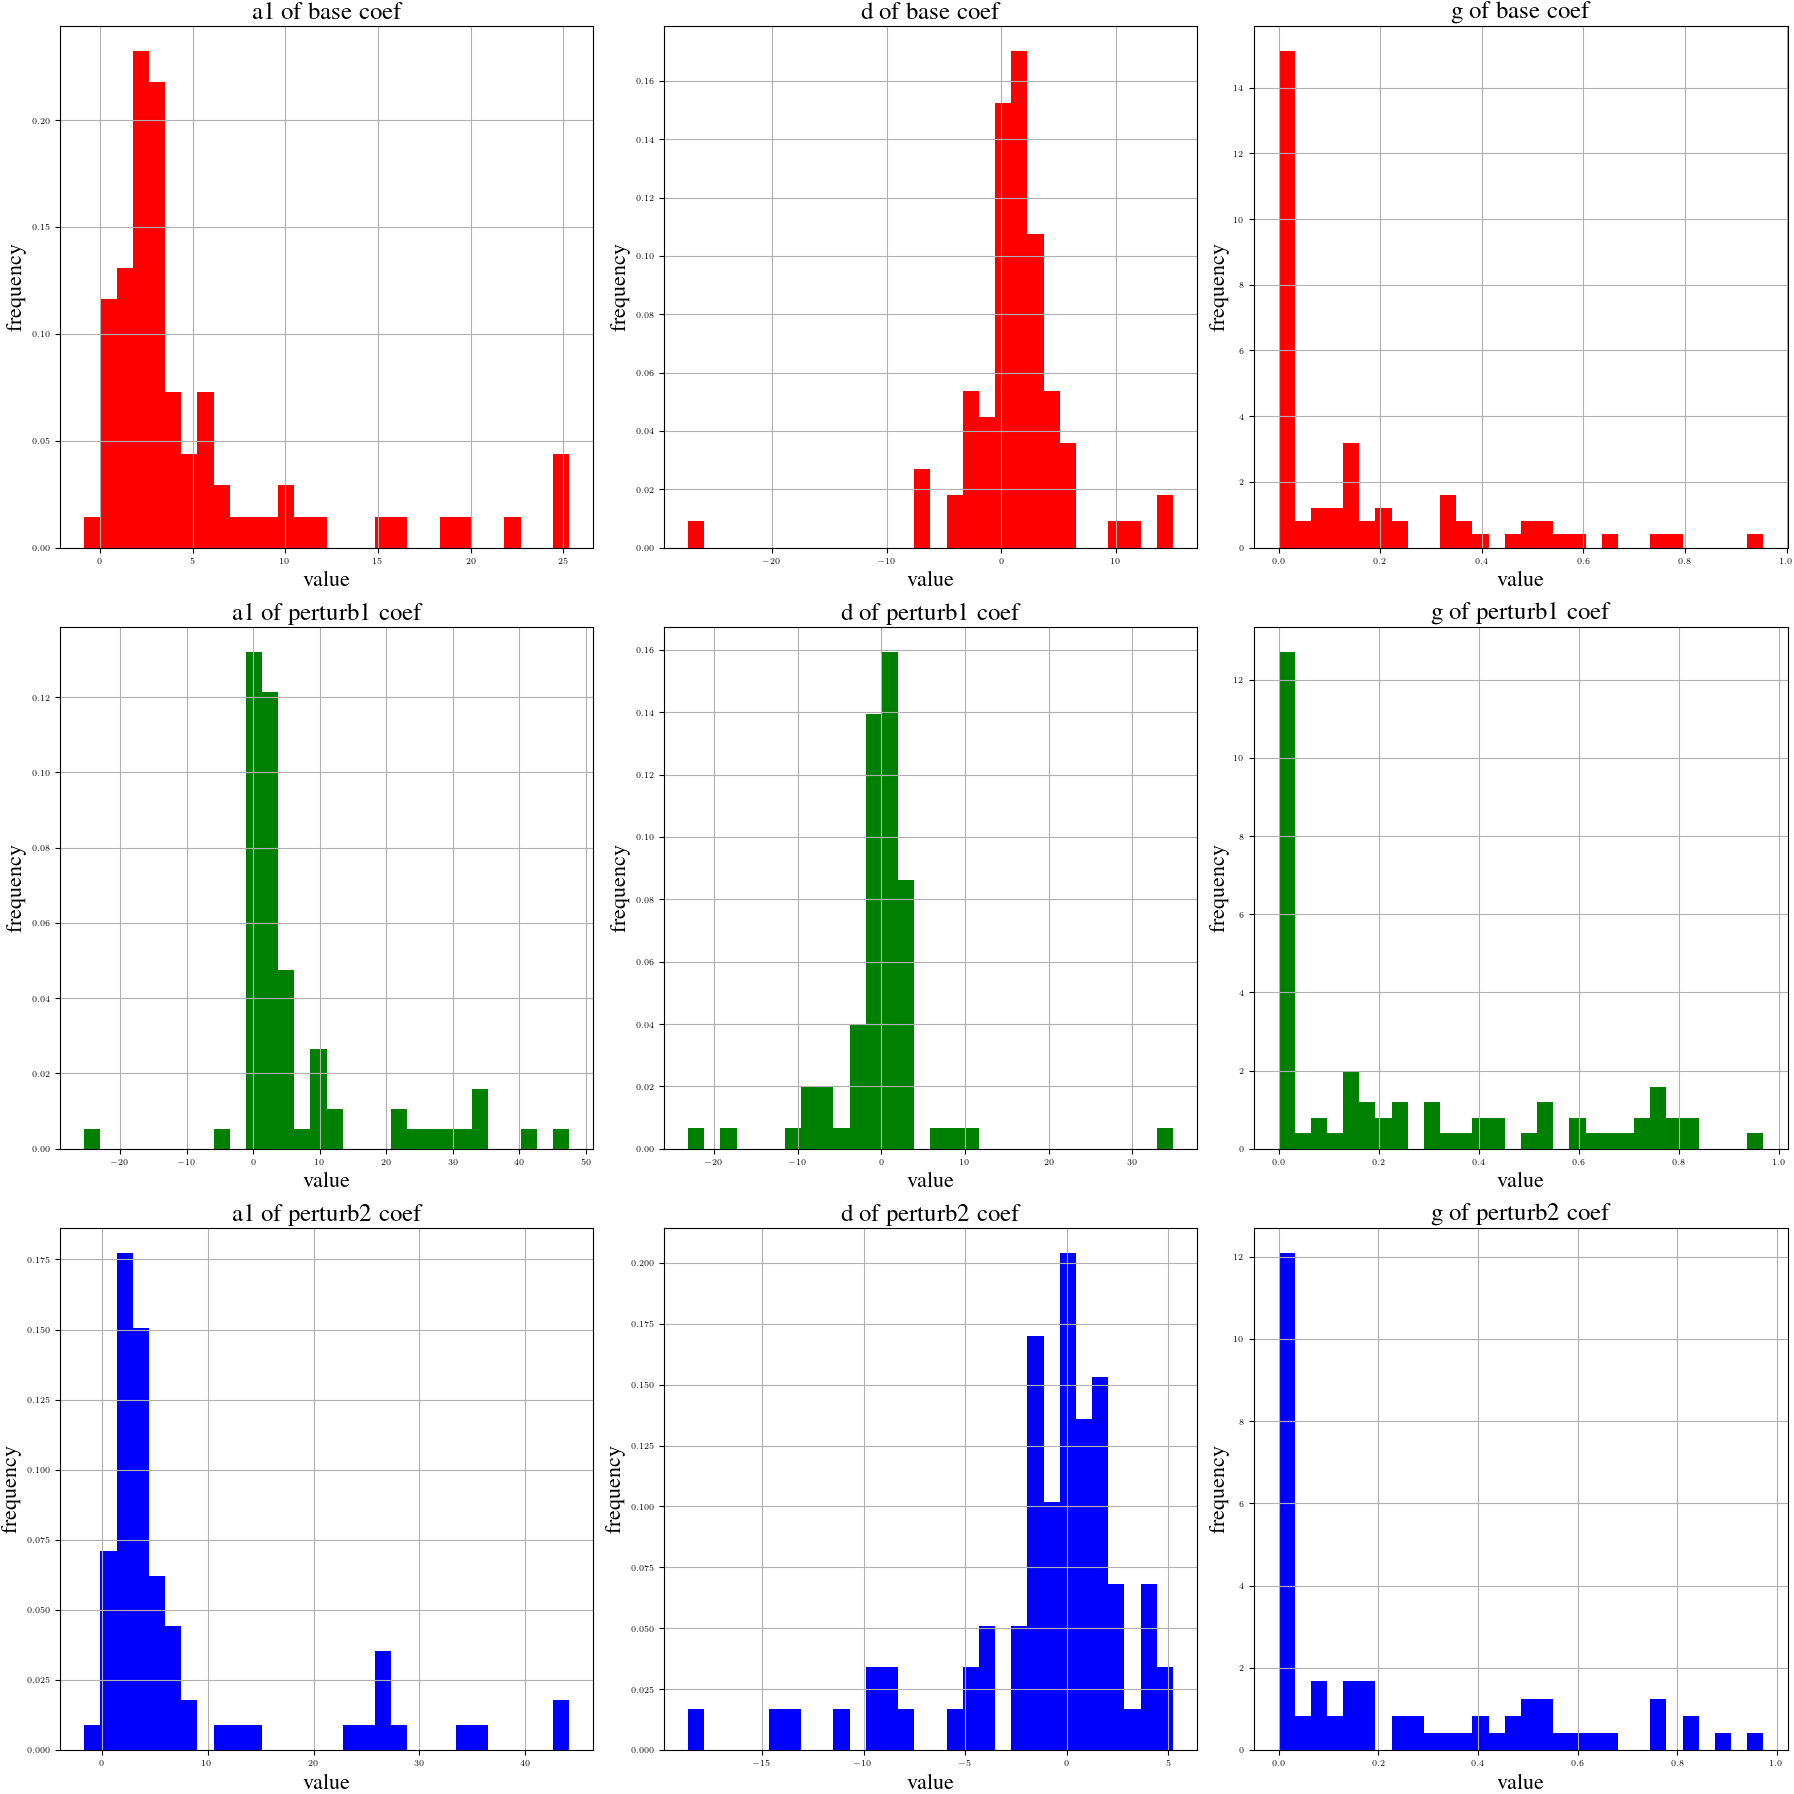

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# from tueplots import bundles
# bundles.icml2022()
# bundles.icml2022(family="sans-serif", usetex=False, column="full", nrows=2)
# plt.rcParams.update(bundles.icml2022())

base_coef = pd.read_csv('model_coef/divided_base_coef_clean.csv', usecols=[0, 1, 2])
perturb1_coef = pd.read_csv('model_coef/divided_perturb1_coef_clean.csv', usecols=[0, 1, 2])
perturb2_coef = pd.read_csv('model_coef/divided_perturb2_coef_clean.csv', usecols=[0, 1, 2])

base_value = [base_coef.iloc[:, i] for i in range(3)]
perturb1_value = [perturb1_coef.iloc[:, i] for i in range(3)]
perturb2_value = [perturb2_coef.iloc[:, i] for i in range(3)]

plt.figure(figsize=(18, 18))

def plot_hist(serial, data, color, para, perturb):
    plt.subplot(3, 3, serial)
    plt.hist(data, bins=30, color=color, density=True)
    plt.xlabel('value', fontsize=16)
    plt.ylabel('frequency', fontsize=16)
    plt.title(f'{para} of {perturb} coef', fontsize=18)
    plt.grid(True)

plot_hist(1, base_value[0], 'r', 'a1', 'base')
plot_hist(2, base_value[1], 'r', 'd', 'base')
plot_hist(3, base_value[2], 'r', 'g', 'base')   

plot_hist(4, perturb1_value[0], 'g', 'a1', 'perturb1')
plot_hist(5, perturb1_value[1], 'g', 'd', 'perturb1')
plot_hist(6, perturb1_value[2], 'g', 'g', 'perturb1')   

plot_hist(7, perturb2_value[0], 'b', 'a1', 'perturb2')
plot_hist(8, perturb2_value[1], 'b', 'd', 'perturb2')
plot_hist(9, perturb2_value[2], 'b', 'g', 'perturb2')   

plt.show()

# Wasserstein Distance

In [27]:
import numpy as np
from scipy.stats import wasserstein_distance

def calculate_wasserstein_distances(vector1, vector2, vector3, bins=30):
    hist1, bin_edges1 = np.histogram(vector1, bins=bins, density=True)
    hist2, bin_edges2 = np.histogram(vector2, bins=bins, density=True)
    hist3, bin_edges3 = np.histogram(vector3, bins=bins, density=True)

    bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
    bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
    bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
    
    distance_1_2 = wasserstein_distance(bin_centers1, bin_centers2, u_weights=hist1, v_weights=hist2)
    distance_1_3 = wasserstein_distance(bin_centers1, bin_centers3, u_weights=hist1, v_weights=hist3)
    distance_2_3 = wasserstein_distance(bin_centers2, bin_centers3, u_weights=hist2, v_weights=hist3)

    return distance_1_2, distance_1_3, distance_2_3

base_coef_1PL = pd.read_csv('model_coef/divided_base_coef_1PL_clean.csv', usecols=[1])
perturb1_coef_1PL = pd.read_csv('model_coef/divided_perturb1_coef_1PL_clean.csv', usecols=[1])
perturb2_coef_1PL = pd.read_csv('model_coef/divided_perturb2_coef_1PL_clean.csv', usecols=[1])

base_value_1PL = base_coef_1PL.iloc[0]
perturb1_value_1PL = perturb1_coef_1PL.iloc[0]
perturb2_value_1PL = perturb2_coef_1PL.iloc[0]

distances = calculate_wasserstein_distances(base_value_1PL, perturb1_value_1PL, perturb2_value_1PL)
print("1PL Wasserstein Distances of d:", distances)



base_coef_2PL = pd.read_csv('model_coef/divided_base_coef_2PL_clean.csv', usecols=[0, 1])
perturb1_coef_2PL = pd.read_csv('model_coef/divided_perturb1_coef_2PL_clean.csv', usecols=[0, 1])
perturb2_coef_2PL = pd.read_csv('model_coef/divided_perturb2_coef_2PL_clean.csv', usecols=[0, 1])

base_value_2PL = [base_coef_2PL.iloc[:, i] for i in range(2)]
perturb1_value_2PL = [perturb1_coef_2PL.iloc[:, i] for i in range(2)]
perturb2_value_2PL = [perturb2_coef_2PL.iloc[:, i] for i in range(2)]

distances = calculate_wasserstein_distances(base_value_2PL[0], perturb1_value_2PL[0], perturb2_value_2PL[0])
print("2PL Wasserstein Distances of a1:", distances)

distances = calculate_wasserstein_distances(base_value_2PL[1], perturb1_value_2PL[1], perturb2_value_2PL[1])
print("2PL Wasserstein Distances of d:", distances)



base_coef_3PL = pd.read_csv('model_coef/divided_base_coef_3PL_clean.csv', usecols=[0, 1, 2])
perturb1_coef_3PL = pd.read_csv('model_coef/divided_perturb1_coef_3PL_clean.csv', usecols=[0, 1, 2])
perturb2_coef_3PL = pd.read_csv('model_coef/divided_perturb2_coef_3PL_clean.csv', usecols=[0, 1, 2])

base_value_3PL = [base_coef_3PL.iloc[:, i] for i in range(3)]
perturb1_value_3PL = [perturb1_coef_3PL.iloc[:, i] for i in range(3)]
perturb2_value_3PL = [perturb2_coef_3PL.iloc[:, i] for i in range(3)]

distances = calculate_wasserstein_distances(base_value_3PL[0], perturb1_value_3PL[0], perturb2_value_3PL[0])
print("3PL Wasserstein Distances of a1:", distances)

distances = calculate_wasserstein_distances(base_value_3PL[1], perturb1_value_3PL[1], perturb2_value_3PL[1])
print("3PL Wasserstein Distances of d:", distances)

distances = calculate_wasserstein_distances(base_value_3PL[2], perturb1_value_3PL[2], perturb2_value_3PL[2])
print("3PL Wasserstein Distances of g:", distances)

1PL Wasserstein Distances of d: (0.44344676370745395, 1.6294096379442937, 1.1859628742368398)
2PL Wasserstein Distances of a1: (1.2505905903023873, 0.4606881647390105, 0.8739673602935095)
2PL Wasserstein Distances of d: (0.979074946410988, 0.8732566577842928, 0.7297662087594025)
3PL Wasserstein Distances of a1: (3.2074482294802364, 2.664705110286811, 1.939286988242578)
3PL Wasserstein Distances of d: (1.9513755651561624, 2.623822824727763, 1.4744723646311388)
3PL Wasserstein Distances of g: (0.09707117313157364, 0.07795064614136328, 0.024526086668500653)


In [28]:
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance

def calculate_wasserstein_distances(vector1, vector2, vector3, bins=30):
    hist1, bin_edges1 = np.histogram(vector1, bins=bins, density=True)
    hist2, bin_edges2 = np.histogram(vector2, bins=bins, density=True)
    hist3, bin_edges3 = np.histogram(vector3, bins=bins, density=True)

    bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
    bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
    bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
    
    distance_1_2 = wasserstein_distance(bin_centers1, bin_centers2, u_weights=hist1, v_weights=hist2)
    distance_1_3 = wasserstein_distance(bin_centers1, bin_centers3, u_weights=hist1, v_weights=hist3)
    distance_2_3 = wasserstein_distance(bin_centers2, bin_centers3, u_weights=hist2, v_weights=hist3)

    return distance_1_2, distance_1_3, distance_2_3

def load_coef_and_calculate_distances(model, columns):
    base_coef = pd.read_csv(f'model_coef/divided_base_coef_{model}_clean.csv', usecols=columns)
    perturb1_coef = pd.read_csv(f'model_coef/divided_perturb1_coef_{model}_clean.csv', usecols=columns)
    perturb2_coef = pd.read_csv(f'model_coef/divided_perturb2_coef_{model}_clean.csv', usecols=columns)
    
    distances_list = []
    
    for i, column in enumerate(columns):
        base_value = base_coef.iloc[:, i]
        perturb1_value = perturb1_coef.iloc[:, i]
        perturb2_value = perturb2_coef.iloc[:, i]
        
        distances = calculate_wasserstein_distances(base_value, perturb1_value, perturb2_value)
        distances_list.append((column, distances))
    
    return distances_list

# Define the models and columns
models = {
    '1PL': [1],
    '2PL': [0, 1],
    '3PL': [0, 1, 2]
}

# Calculate and print the distances
for model, columns in models.items():
    distances = load_coefficients_and_calculate_distances(model, columns)
    for column, dist in distances:
        print(f"{model} Wasserstein Distances of {column}:", dist)


1PL Wasserstein Distances of 1: (0.3946991636785091, 0.27486733981888867, 0.4034050263265615)
2PL Wasserstein Distances of 0: (1.2505905903023873, 0.4606881647390105, 0.8739673602935095)
2PL Wasserstein Distances of 1: (0.979074946410988, 0.8732566577842928, 0.7297662087594025)
3PL Wasserstein Distances of 0: (3.2074482294802364, 2.664705110286811, 1.939286988242578)
3PL Wasserstein Distances of 1: (1.9513755651561624, 2.623822824727763, 1.4744723646311388)
3PL Wasserstein Distances of 2: (0.09707117313157364, 0.07795064614136328, 0.024526086668500653)
